### practical 11 Write the program to apply segmentation for detecting lines,circles, and other shapes/objects. Also, implement edge-based and region-based segmentation.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('lenna_original.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
edges = cv2.Canny(gray, threshold1=50, threshold2=200, apertureSize=3)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

In [10]:
# circle detection (NOTE: run with CAUTION requires lots of cpu power) 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), thickness=2)

# code will run fine even if you don't run this block 

(-0.5, 1959.5, 1959.5, -0.5)

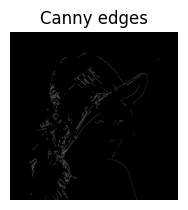

In [6]:
#edge base detection
edges = cv2.Canny(gray, threshold1=50, threshold2=200, apertureSize=3)
plt.subplot(221)
plt.imshow(edges, cmap='gray')
plt.title('Canny edges')
plt.axis('off')

(-0.5, 1959.5, 1959.5, -0.5)

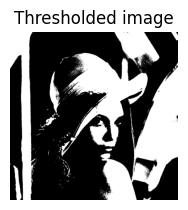

In [7]:
ret, thresh = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.subplot(222)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded image')
plt.axis('off')

In [8]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)


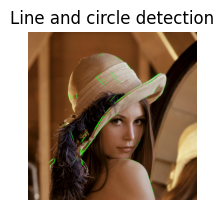

In [9]:
plt.subplot(223)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Line and circle detected')
plt.axis('off')

plt.show()